 # News Article Classification


### In today’s digital world, news articles are constantly being generated and shared across
### different platforms. For news organizations, social media platforms, and aggregators,
### classifying articles into specific categories such as sports, politics, and technology can help
### improve content management and recommendation systems. This project aims to develop a
### machine learning model that can classify news articles into predefined categories, such as

### Data Collection & Preprocessing

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("data_news.xlsx")

# Display the first few rows
df.head()


,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


### Understand the Dataset

In [2]:
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check unique categories
print("\nUnique categories:\n", df['category'].value_counts())


Dataset shape: (50000, 5)

Column names: ['category', 'headline', 'links', 'short_description', 'keywords']

Missing values:
 category                0
headline                0
links                   0
short_description       6
keywords             2706
dtype: int64

Unique categories:
 category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


In [3]:
# Fill missing short_description with empty string
df['short_description'] = df['short_description'].fillna('')

# Combine with headline to form 'text'
df['text'] = df['headline'].fillna('') + ' ' + df['short_description']

# Keep only needed columns
df = df[['text', 'category']]


In [4]:
df.head()

,text,category
0,143 Miles in 35 Days: Lessons Learned Resting ...,WELLNESS
1,Talking to Yourself: Crazy or Crazy Helpful? T...,WELLNESS
2,Crenezumab: Trial Will Gauge Whether Alzheimer...,WELLNESS
3,"Oh, What a Difference She Made If you want to ...",WELLNESS
4,"Green Superfoods First, the bad news: Soda bre...",WELLNESS


### Text Cleaning


In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# List of common stopwords like 'the', 'is', 'and', etc.
stop_words = set(stopwords.words('english'))

# Very simple cleaning function
def clean_text(text):
    text = text.lower()  # make lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove everything except letters and spaces
    words = text.split()  # split sentence into words
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

# Apply this cleaning to our text column
df['clean_text'] = df['text'].apply(clean_text)

# See cleaned result
df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mukulsinghlatwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,143 Miles in 35 Days: Lessons Learned Resting ...,miles days lessons learned resting part traini...
1,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...
2,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimers drug...
3,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...
4,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...


### Feature Extraction using TF-IDF


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use top 5000 words to keep it simple and fast
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['clean_text'])

# Our target/output labels
y = df['category']


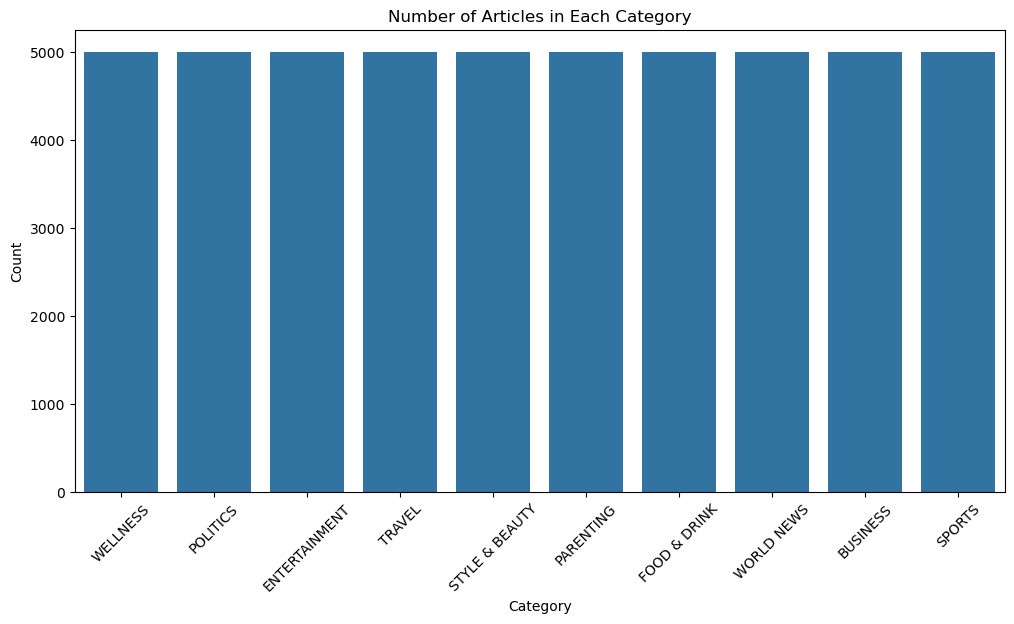

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Articles in Each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


### Model Building & Training

In [8]:
from sklearn.model_selection import train_test_split

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7893
                precision    recall  f1-score   support

      BUSINESS       0.72      0.79      0.75       955
 ENTERTAINMENT       0.77      0.77      0.77       985
  FOOD & DRINK       0.84      0.82      0.83      1021
     PARENTING       0.78      0.76      0.77      1030
      POLITICS       0.79      0.73      0.76      1034
        SPORTS       0.86      0.87      0.87       995
STYLE & BEAUTY       0.86      0.83      0.84       986
        TRAVEL       0.81      0.79      0.80      1008
      WELLNESS       0.71      0.76      0.73      1009
    WORLD NEWS       0.77      0.80      0.78       977

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



### Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

# Create and train model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7747
                precision    recall  f1-score   support

      BUSINESS       0.73      0.72      0.72       955
 ENTERTAINMENT       0.79      0.74      0.76       985
  FOOD & DRINK       0.83      0.83      0.83      1021
     PARENTING       0.68      0.74      0.71      1030
      POLITICS       0.78      0.72      0.75      1034
        SPORTS       0.87      0.86      0.86       995
STYLE & BEAUTY       0.84      0.82      0.83       986
        TRAVEL       0.78      0.80      0.79      1008
      WELLNESS       0.69      0.73      0.71      1009
    WORLD NEWS       0.78      0.79      0.78       977

      accuracy                           0.77     10000
     macro avg       0.78      0.77      0.78     10000
  weighted avg       0.78      0.77      0.78     10000



### Support Vector Machine

In [11]:
from sklearn.svm import LinearSVC

# Create and train model
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7826
                precision    recall  f1-score   support

      BUSINESS       0.72      0.78      0.75       955
 ENTERTAINMENT       0.77      0.75      0.76       985
  FOOD & DRINK       0.83      0.83      0.83      1021
     PARENTING       0.76      0.75      0.75      1030
      POLITICS       0.77      0.71      0.74      1034
        SPORTS       0.86      0.91      0.88       995
STYLE & BEAUTY       0.84      0.84      0.84       986
        TRAVEL       0.79      0.77      0.78      1008
      WELLNESS       0.72      0.72      0.72      1009
    WORLD NEWS       0.76      0.78      0.77       977

      accuracy                           0.78     10000
     macro avg       0.78      0.78      0.78     10000
  weighted avg       0.78      0.78      0.78     10000



Insights:
Logistic Regression performed the best overall.
Naive Bayes was a close second and performed well with certain categories like FOOD & DRINK and SPORTS.
SVM had slightly lower overall accuracy than Logistic Regression but gave the best recall for SPORTS (0.91).



### Model accuracy plot

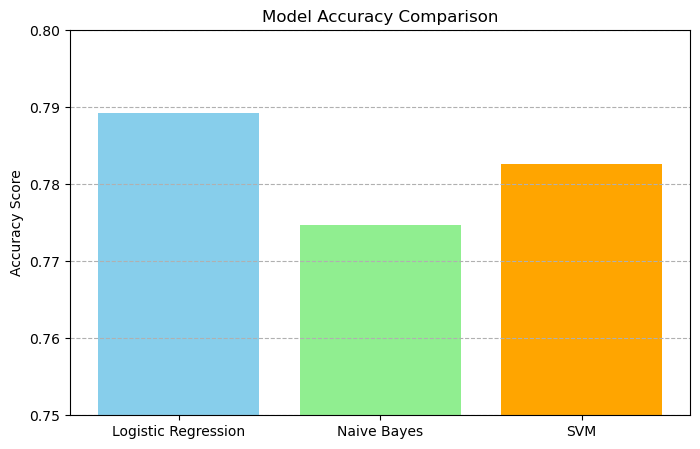

In [12]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'SVM']
scores = [0.7893, 0.7747, 0.7826]

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['skyblue', 'lightgreen', 'orange'])
plt.ylim(0.75, 0.80)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.grid(axis='y', linestyle='--')
plt.show()


### predict the category of a new, unseen news article using your trained Logistic Regression model and TF-IDF vectorizer

In [13]:
# Function to clean and predict category
def predict_category(text):
    # Clean the input text
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    
    # Convert to TF-IDF vector
    vector = tfidf.transform([cleaned_text])
    
    # Predict category
    predicted_label = lr.predict(vector)[0]
    return predicted_label


In [14]:
# Example article
new_article = "Top 10 hidden gems in Europe you must visit this summer"

# Predict the category
predicted = predict_category(new_article)
print("Predicted Category:", predicted)


Predicted Category: TRAVEL
